In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1: Read Data

In [32]:
df = pd.read_csv('housing.csv')

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [35]:
df.shape

(20640, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.871975,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899973,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 2: Identify All Missing values and Handel it

In [38]:
df.duplicated().sum()
# no duplicate values

np.int64(0)

In [39]:
df.isnull().sum().sort_values(ascending = False)

,0
total_bedrooms,207
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [40]:
df.fillna({ 'total_bedrooms': df['total_bedrooms'].median()},inplace =True)

In [41]:
df.isnull().sum().sum()

np.int64(0)

## Features Analysis

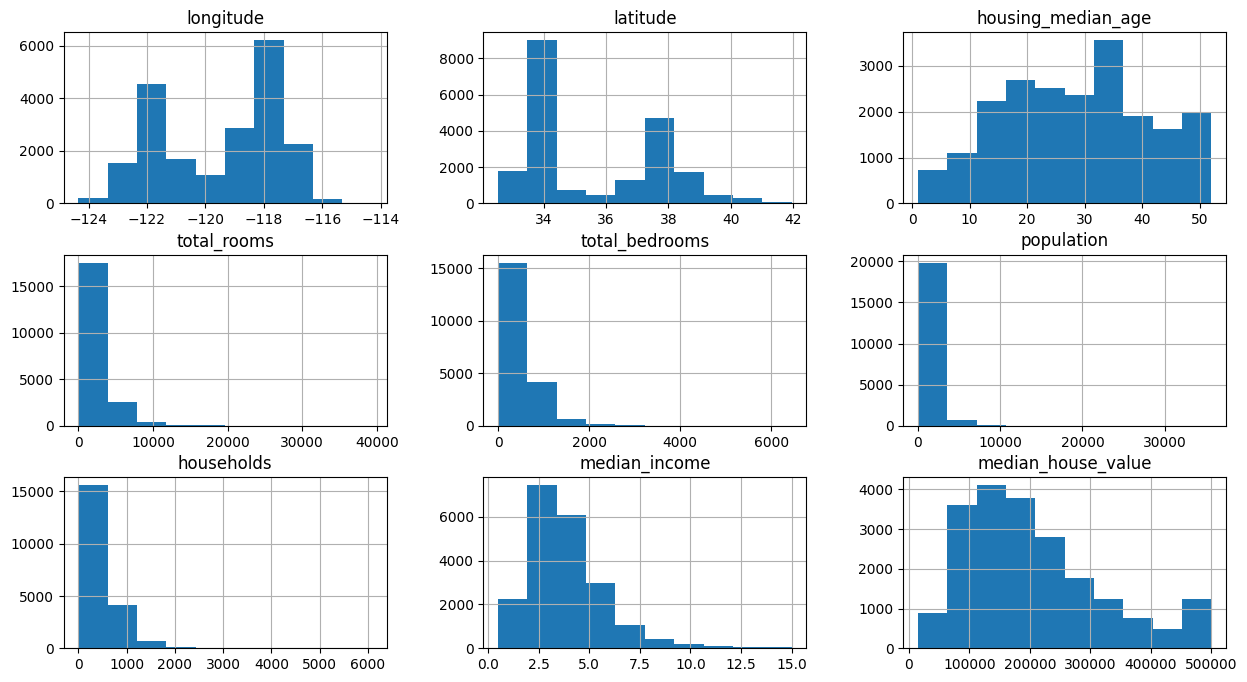

In [42]:
df.hist(figsize=(15,8))
plt.show()

**Histograme Findings:**



* Numerical columns have different scales
* `medina_income` income scalled and capped from 0.5 to 15.
* the target column median_house_value have a limit at 500K means any predications beyond 500k will not be accuratly predicted with our model
* almost all features are right skewed
* except `longitude` all features are in positive range (boxcox will work prefectelly)


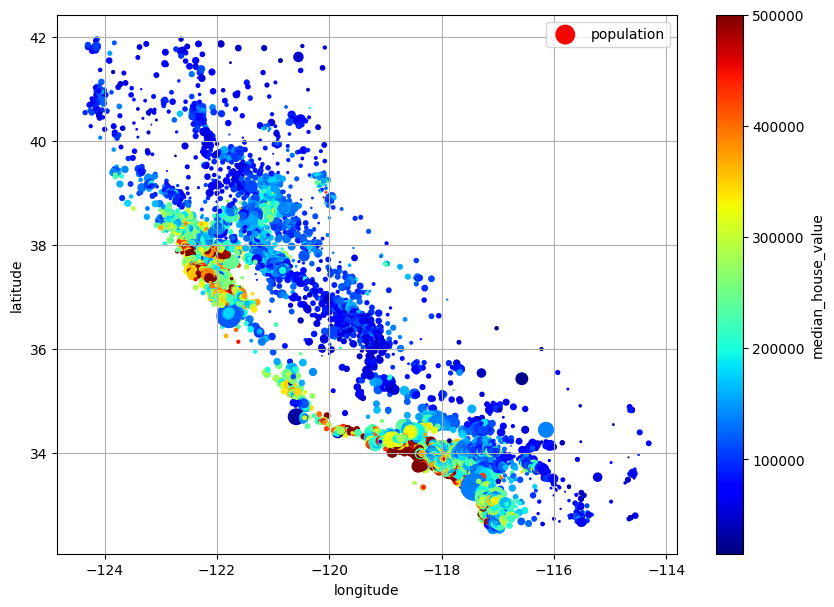

In [43]:
df.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = True,s = df['population']/100 ,label = 'population', c = 'median_house_value' , cmap = 'jet', figsize =(10,7) )
plt.show()

#Ocean proximity can help predict prices, but it's not a strict rule.
#Example: in Northern California, some coastal districts are not very expensive.

# Look for Correlations

In [44]:
corr = df.select_dtypes(include=['number']).corr()
corr['median_house_value'].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687991
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
population,-0.024650
longitude,-0.045967
latitude,-0.144160


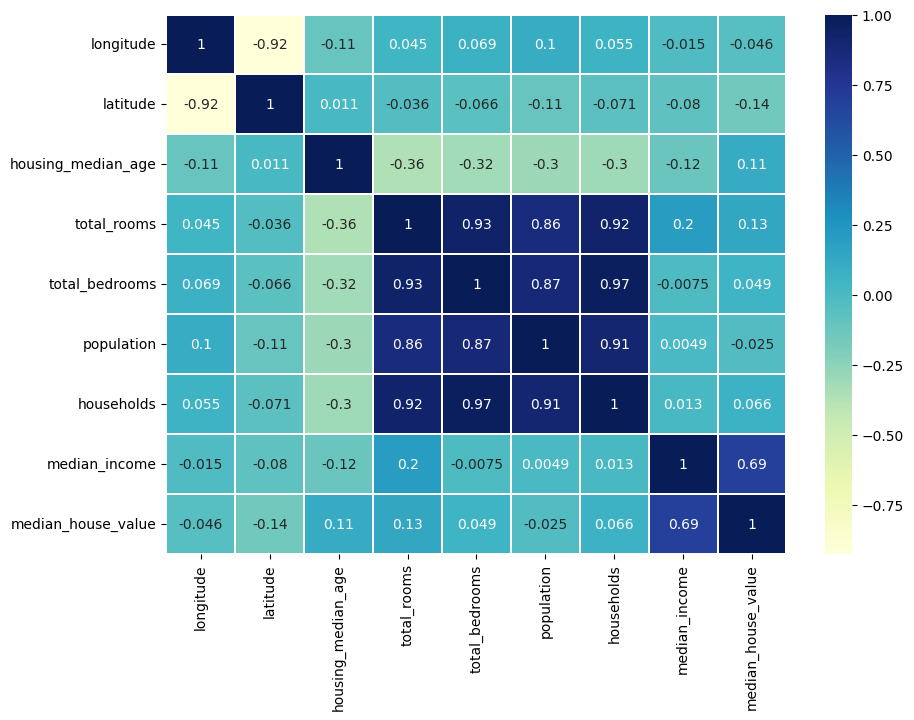

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(data =corr , annot = True , cmap = "YlGnBu",linewidths=0.2)
plt.show()

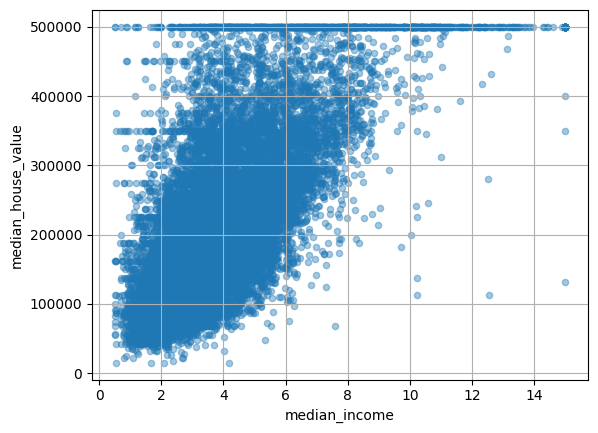

In [46]:
df.plot(kind = 'scatter' , x = 'median_income',y= 'median_house_value', grid = True,alpha = 0.4)
plt.show()

# Prepare the Data for Machine Learning Algorithms

# Feature Engineering

In [47]:
df['bedrooms_ratio'] = df['total_bedrooms'] / df['total_rooms']

In [48]:
df['room_per_house'] = df['total_rooms'] / df['households']

In [49]:
df['people_per_house'] = df['population'] / df['households']

Data Spliting

In [50]:
X = df.drop(columns = ['median_house_value'])
y = df.median_house_value

In [51]:
X.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [52]:
# one_hot_encoding
X = pd.get_dummies(X , drop_first = True , dtype = int)

In [53]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_ratio,room_per_house,people_per_house,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.146591,6.984127,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.155797,6.238137,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.129516,8.288136,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.184458,5.817352,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.172096,6.281853,2.181467,0,0,1,0


In [54]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [55]:
from sklearn.model_selection import train_test_split

X_train , X_test ,y_train ,y_test = train_test_split(X,y , test_size =0.2,random_state =42 )

# Numeircal Columns Transform

In [56]:
num_col = ['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

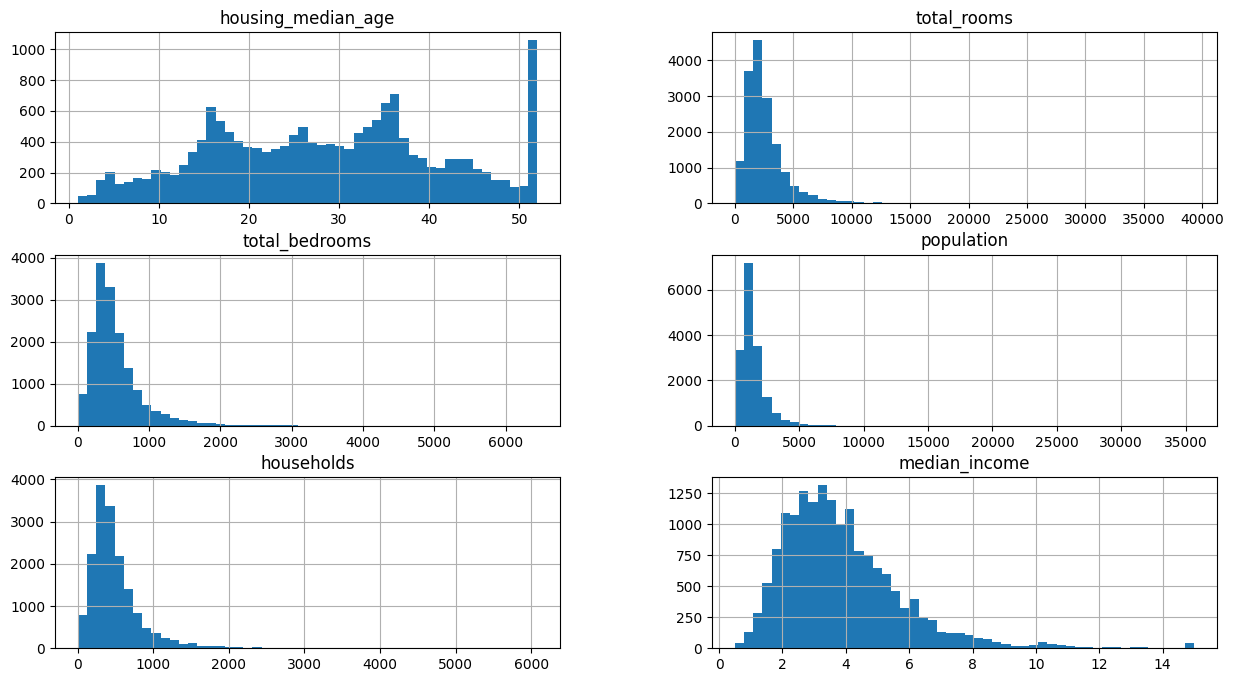

In [57]:
X_train[num_col].hist(figsize = (15,8) ,bins =50)
plt.show()

# Transformation

In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
X_train[num_col] = pt.fit_transform(X_train[num_col])
X_test[num_col]= pt.transform(X_test[num_col])

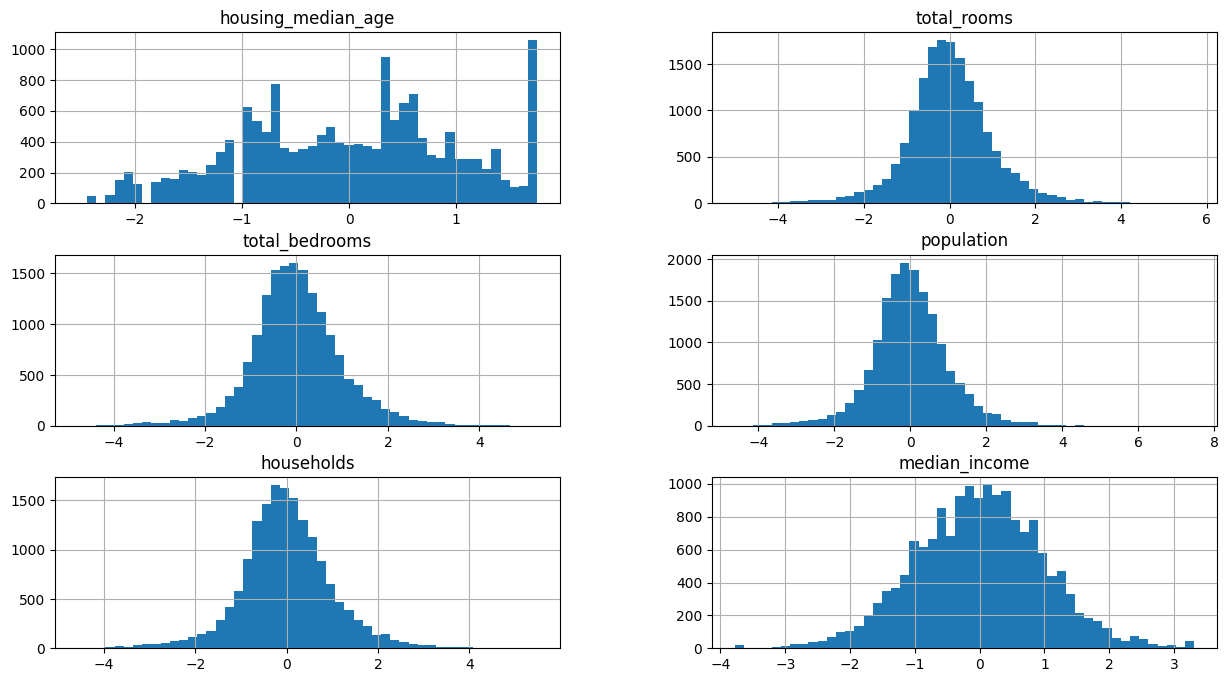

In [59]:
X_train[num_col].hist(figsize = (15,8) ,bins= 50 )
plt.show()

# Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

/tmp/ipython-input-3367923293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature_importance.values , y = feature_importance.index,palette ='viridis')


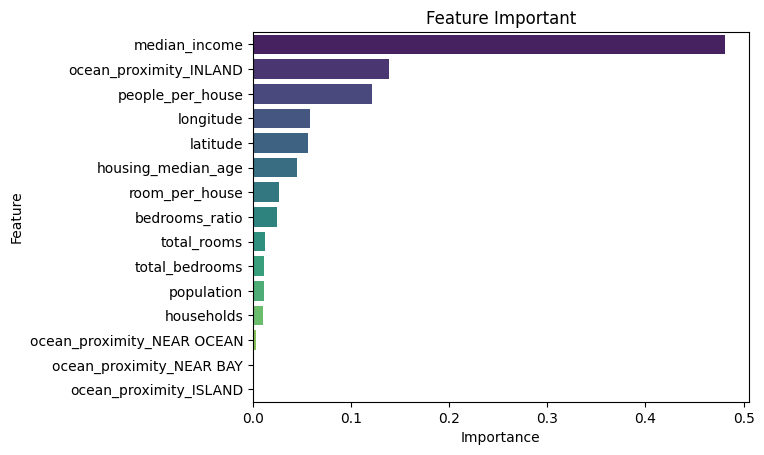

In [69]:
feature_importance = pd.Series(model.feature_importances_,index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_importance.values , y = feature_importance.index,palette ='viridis')
plt.title('Feature Important')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [70]:
model.score(X_test,y_test)

0.805990098662928